In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_csv('df',index_col=False)

In [3]:
dummies = pd.get_dummies(df['Type'])
df = pd.concat([df.drop('Type', axis=1), dummies], axis=1)

dummies = pd.get_dummies(df['Furnished'])
df = pd.concat([df.drop('Furnished', axis=1), dummies], axis=1)

df['Utilities_included'] = df['Utilities_included'].astype(int)

In [4]:
X = df.drop(['Title', 'Location', 'Price', 'Availability_date', 'URL'], axis=1)
y = df['Price']
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2)

In [5]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [6]:
predictions = lr.predict(X_test)

<AxesSubplot:xlabel='Price'>

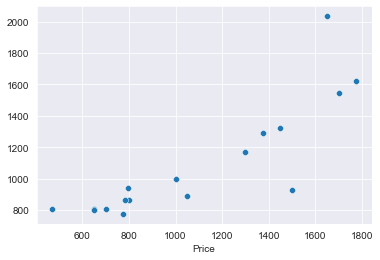

In [7]:
sns.scatterplot(x=y_test, y=predictions)

MAE 146.65840856155535
MSE 36357.90300551382
RMSE 190.67748426469714
Variance 0.7586667218363613


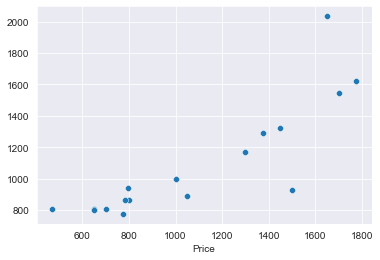

In [8]:
sns.scatterplot(x=y_test, y=predictions)
print('MAE', metrics.mean_absolute_error(y_test, predictions))
print('MSE', metrics.mean_squared_error(y_test, predictions))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Variance', metrics.explained_variance_score(y_test, predictions))